In [ ]:
# IQ de la muestra (n = 16) es de 105
# IQ de la población es de 100 con std = 15

# HIPOTESIS:
  # Ho: Los estudiantes de ciencias de dato NO tienen un IQ mayor que el prom poblacional
  # H1: Los estudiantes de ciencias de dato tienen un IQ mayor que el prom poblacional

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mu_observado = 105 # Mu observado, media muestral
n = 16 # tamaño de la muestra

mu_poblacion = 100 # Mu poblacional
std_poblacion = 15 # desviación std de la población

N = 100000

In [ ]:
medias = np.zeros(N)
for i in range(N):
  muestras = np.random.normal(loc = mu_poblacion, scale = std_poblacion, size = n)
  medias[i] = muestras.mean()

In [ ]:
medias

array([101.73149455,  99.65984134,  98.97474518, ..., 105.58455257,
        99.44055099,  98.69173901])

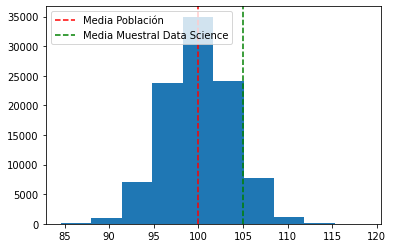

In [ ]:
plt.hist(medias)
plt.axvline(mu_poblacion, c = 'r', ls = '--', label = 'Media Población')
plt.axvline(mu_observado, c = 'g', ls = '--', label = 'Media Muestral Data Science')
plt.legend()
plt.show()

In [ ]:
eventos_mas_extremos = medias[medias >= mu_observado]

In [ ]:
eventos_mas_extremos

array([105.31148619, 106.950445  , 106.87532506, ..., 107.6620841 ,
       105.14612392, 105.58455257])

In [ ]:
eventos_mas_extremos.size

9130

In [ ]:
p_valor = eventos_mas_extremos.size / N

In [ ]:
p_valor

0.0913

In [ ]:
nivel_significancia = 0.05

In [ ]:
# Método estadístico analítico
z = (mu_observado - mu_poblacion)/(std_poblacion/n**(0.5))

In [ ]:
z

1.3333333333333333

In [ ]:
tabla = 0.9082

In [ ]:
p_analitico = 1 - 0.9082

In [ ]:
p_analitico

0.09179999999999999

Intervalos de confianza

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
datosNB = pd.read_csv('/content/drive/MyDrive/Publico/ds-online-76/nchs_birth_2011.csv', sep = ',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
datosNB.head()

,FILLER1,REVISION,FILLER2,DOB_YY,DOB_MM,FILLER3,DOB_WK,OTERR,FILLER4,OCNTY,...,F_UCA_SPINA,FILLER77,F_UCA_OMPHALO,FILLER78,F_UCA_CLEFTLP,FILLER79,F_UCA_HERNIA,FILLER80,F_UCA_DOWNS,FILLER81
0,,A,,2011,1,,7,PR,,127,...,1,,1,,1,,1,,1,
1,,A,,2011,1,,7,PR,,25,...,1,,1,,1,,1,,1,
2,,A,,2011,1,,1,PR,,999,...,1,,1,,1,,1,,1,
3,,A,,2011,1,,3,PR,,25,...,1,,1,,1,,1,,1,
4,,A,,2011,1,,2,PR,,999,...,1,,1,,1,,1,,1,


In [ ]:
columnas_interes = ['DOB_MM', 'DOB_WK', 'OCNTY', 'MAGER', 'MRCNTY', 'FAGECOMB', 'DWGT', 'DMETH_REC', 'APGAR5', 'SEX' , 'COMBGEST', 'DBWT']

In [ ]:
datosNB = datosNB[columnas_interes]

In [ ]:
datosNB.head()

,DOB_MM,DOB_WK,OCNTY,MAGER,MRCNTY,FAGECOMB,DWGT,DMETH_REC,APGAR5,SEX,COMBGEST,DBWT
0,1,7,127,24,999,25,160,1,9,M,38,3090
1,1,7,25,19,25,21,143,1,9,F,39,3062
2,1,1,999,25,999,45,172,1,10,F,39,3062
3,1,3,25,38,25,32,192,2,9,F,39,3062
4,1,2,999,23,999,25,194,1,9,M,39,3941


In [ ]:
df1 = datosNB.DBWT[datosNB.SEX == 'M']
df2 = datosNB.DBWT[datosNB.SEX == 'F']

In [ ]:
df1

0        3090
4        3941
5        3345
9        3657
10       3175
         ... 
41120    3487
41122    3657
41124    3090
41126    2296
41129    3771
Name: DBWT, Length: 20990, dtype: int64

In [ ]:
df2

1        3062
2        3062
3        3062
6        3430
7        2013
         ... 
41121    3204
41123    3544
41125    3260
41127    2920
41128    2863
Name: DBWT, Length: 20140, dtype: int64

In [ ]:
import seaborn as sb
from scipy import stats
import math

Text(0.5, 1.0, 'Peso de los nacimientos por género')

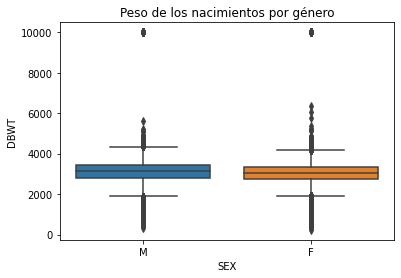

In [ ]:
sb.boxplot(x = 'SEX', y = 'DBWT', data = datosNB)
plt.title('Peso de los nacimientos por género')

In [ ]:
n1 = df1.size # Tamaño primera muestra, chicos
n2 = df2.size # Tamaño segunda muestra, chicas

m1 = df1.mean()
m2 = df2.mean()

std1 = df1.std()
std2 = df2.std()


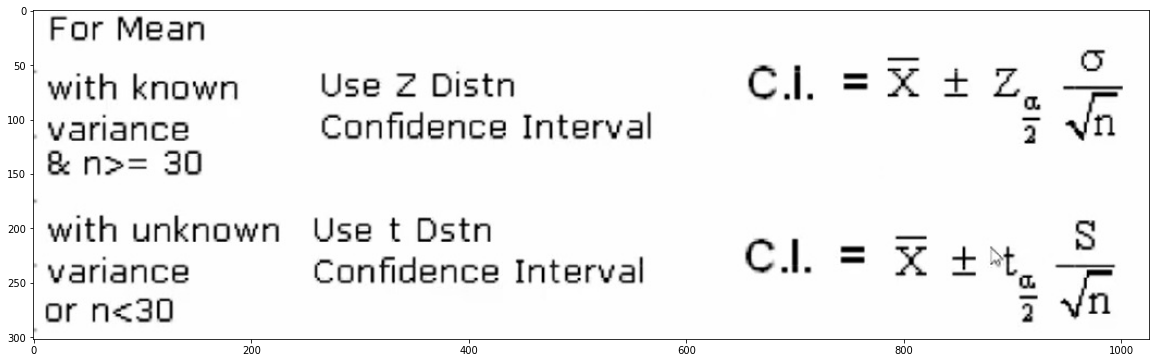

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Publico/ds-online-76/ic.jpg')
plt.figure(figsize = (20,20))
plt.imshow(img)
plt.show()

In [ ]:
nivel_significancia = 0.05
confianza = 1 - nivel_significancia

In [ ]:
h1 = std1 / math.sqrt(n1) * stats.t.ppf((1 + confianza) / 2, n1 - 1) # Usando los parámetros de los chicos
h2 = std2 / math.sqrt(n2) * stats.t.ppf((1 + confianza) / 2, n2 - 1) # Usando los parámetros de las chicas

In [ ]:
print('DBWT intervalo de confianza para chicos: ', m1 - h1, m1 + h1 )
print('DBWT intervalo de confianza para chicas: ', m2 - h2, m2 + h2 )

DBWT intervalo de confianza para chicos:  3119.1440936562713 3138.200832499041
DBWT intervalo de confianza para chicas:  3024.1719063391874 3043.126107563494


In [ ]:
tprueba, pvalor = stats.ttest_ind(df1, df2, equal_var = False)

In [ ]:
pvalor

1.4021551918798503e-43

In [ ]:
# Rechazamos la hipótesis nula porque el valor p es muy cercano a cero y alpha = 0.05